# Expected return
By Evgenia "Jenny" Nitishinskaya and Delaney Granizo-Mackenzie

Notebook released under the Creative Commons Attribution 4.0 License.

---
A common way of evaluating a portfolio is computing its expected return, which corresponds to the reward for investing in that portfolio, and the variance of the return, which corresponds to the risk. To compute the expected return, we use the linearity property of expected value:

$$ E(R_p) = E(w_1 R_1 + w_2 R_2 + \ldots + w_n R_n) = w_1 E(R_1) + w_2 E(R_2) + \ldots w_n E(R_n) $$

So the expected return of our portfolio $R_p$, which is a weighted average of some securities, is the weighted average of the expected returns on the individual securities $R_i$. As with the expected value of other variables, we can compute this from a known or estimated probability distribution, or empirically from historical data.

# Portfolio variance

To compute the variance of the portfolio, we need to define the <i>covariance</i> between two random variables:

$$ Cov(R_i, R_j) = E[(R_i - E[R_i])(R_j - E[R_j])] $$

This is an extension of the idea of variance &mdash; notice that $Cov(R_i, R_i) = E[(R_i - E[R_i])^2] = Var(R_i)$. We can summarize the covariances in a covariance matrix, where the $ij$th entry is $Cov(R_i, R_j)$. For two variables, it looks like this:

$$ \left( \begin{array}{cc}
Var(R_1) & Cov(R_1, R_2) \\
Cov(R_1, R_2) & Var(R_2) \end{array} \right) $$

The covariance is useful here because when we expand the variance of the portfolio returns $Var(R_p)$, we find that

$$ Var(R_p) = E[(R_p - E[R_p])^2] = E\left[ \left(\sum_{i=1}^n w_i R_i - E\left[\sum_{i=1}^n w_i R_i \right] \right) \right] = \ldots = \sum_{i=1}^n \sum_{j=1}^n w_i w_j Cov(R_i, R_j)$$

So, the variance of the portfolio returns is the weighted sum of the covariances of the individual securities' returns (with each term involving two different securities appearing twice). If our portfolio consists of two securities, then

$$Var(R_p) = w_1^2 Var(R_1) + 2w_1 w_2 Cov(R_1, R_2) + w_2^2 Var(R_2)$$

Notice that there are $n^2$ terms in this sum, of which only $n$ are variances of individual securities $Var(R_i)$. Therefore, the covariances of pairs of securities play a huge role. We will see in the next section that covariances correspond to correlations, which is why minimizing correlations between securities is vital for minimizing portfolio variance (i.e. risk).

## Correlation

The covariance of two variables is negative if, on average, one is above its expected value when the other is below its expected value, and vice versa. The covariance is positive if the two variables tend to be on the same side of their expected values at the same time (in particular, variance is always positive). However, the magnitude of the covariance doesn't tell us much. Therefore we define <i>correlation</i> as follows:

$$ \rho(R_i, R_j) = \frac{Cov(R_i, R_j)}{\sigma(R_i)\sigma(R_j)} $$

The correlation is normalized and unitless, so its value is always between -1 and 1. Since $\sigma$ is always positive, the same sign rules apply to correlation as to covariance. Additionally, we can say that the smaller $\rho$ is in absolute value, the weaker the linear relationship ($R_1 = a + b R_2 + $ error) between the variables. A positive correlation means that $b>0$, and the variables are called correlated. A variable has a correlation of 1 with itself, which indicates a perfect linear relationship. A negative correlation indicates an inverse linear relationship ($b<0$), and we say that the variables are anticorrelated. If $\rho = 0$, then $b=0$ in this relationship, and the variables are uncorrelated.

Two independent variables are always uncorrelated, but the converse is not always true.

Below we compute the correlation matrix for some returns, and plot the most and the least correlated pairs.

In [156]:
# Import for plotting
import matplotlib.pyplot as plt

# Get returns data for 5 different assets
assets = ['XLK', 'MIG', 'KO', 'ATHN', 'XLY']
data = get_pricing(assets,fields='price',start_date='2014-01-01',end_date='2015-01-01').pct_change()[1:].T

# Print pairwise correlations
print 'Correlation matrix:\n', np.corrcoef(data)

# Print the mean return of each
print 'Means:\n', data.T.mean()

Correlation matrix:
[[ 1.          0.23194547  0.26660902  0.46651736  0.82990042]
 [ 0.23194547  1.          0.0228684   0.22597695  0.28042275]
 [ 0.26660902  0.0228684   1.          0.07741378  0.28296692]
 [ 0.46651736  0.22597695  0.07741378  1.          0.47010889]
 [ 0.82990042  0.28042275  0.28296692  0.47010889  1.        ]]
Means:
Equity(19658 [XLK])     0.000650
Equity(13895 [MIG])     0.001072
Equity(4283 [KO])       0.000195
Equity(34692 [ATHN])    0.000876
Equity(19662 [XLY])     0.000359
dtype: float64


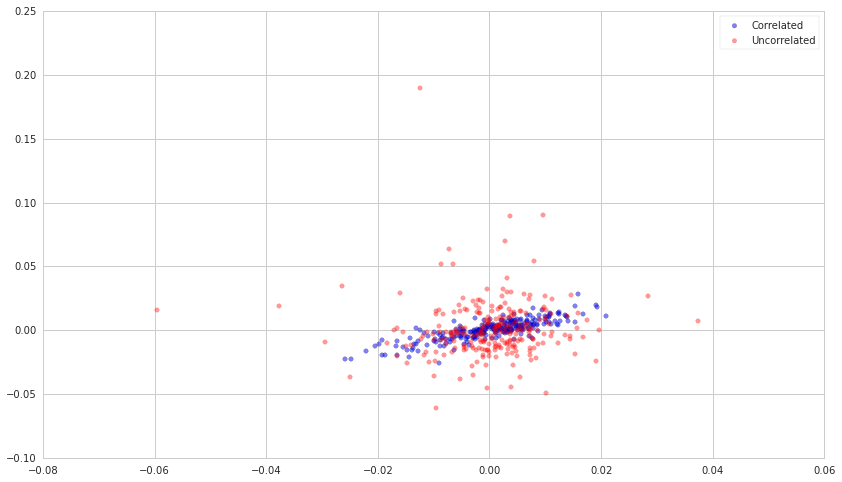

In [157]:
# Plot what we've identified as the most and the least correlated pairs from the matrix above
plt.scatter(data.iloc[4], data.iloc[0], alpha=0.5)
plt.scatter(data.iloc[2], data.iloc[1], color='r', alpha=0.4)
plt.legend(['Correlated', 'Uncorrelated']);

All of the means are approximately 0, so we can intuitively see the correlation from the plot. The blue data is mostly in the top right and bottom left quadrants, so the variables are generally either both positive (i.e. both above their means, since both have mean approximately 0) or both negative. This means that they are positively correlated. The red data is scattered fairly evenly across the quadrants, so there is no relationship between the data; x and y are both positive or both negative about as often as they have opposite signs.